### Cadenas de markov para predecir el lenguaje - Metegol

In [ ]:
import re
import random
from collections import defaultdict

class MarkovChainPredictor:
    def __init__(self):
        self.transition_matrix = defaultdict(lambda: defaultdict(int))
        self.terminal_states = set([".", "?"])

    def train(self, text):
        """
        Entrena el modelo de cadenas de Markov usando un texto dado.
        
        :param text: Cadena con el texto de entrenamiento.
        """
        words = re.findall(r'\w+|[.!?]', text)
        for i in range(len(words) - 1):
            current_word = words[i]
            next_word = words[i + 1]
            self.transition_matrix[current_word][next_word] += 1

    def print_transition_matrix_for_word(self, word):
        """
        Imprime la matriz de transición para una palabra específica.
        
        :param word: La palabra para la que se quiere imprimir la matriz de transición.
        """
        if word in self.transition_matrix:
            print(f"Transiciones para la palabra '{word}':")
            for next_word, count in self.transition_matrix[word].items():
                print(f"  {next_word}: {count}")
        else:
            print(f"La palabra '{word}' no tiene transiciones registradas.")

    def predict_next_word(self, current_word):
        """
        Predice la siguiente palabra basada en el modelo de cadenas de Markov.
        
        :param current_word: La palabra actual.
        :return: La siguiente palabra predicha o None si no hay una predicción.
        """
        next_words = self.transition_matrix[current_word]
        if not next_words:
            return None

        total_transitions = sum(next_words.values())
        words, probabilities = zip(*[(word, count / total_transitions) for word, count in next_words.items()])

        return random.choices(words, probabilities)[0]

    def generate_sentence(self, start_word):
        """
        Genera una oración a partir de una palabra inicial hasta llegar a un estado terminal.
        
        :param start_word: La palabra inicial de la oración.
        :return: Una oración generada como cadena.
        """
        current_word = start_word
        sentence = [current_word]

        while current_word not in self.terminal_states:
            next_word = self.predict_next_word(current_word)
            if not next_word:
                break
            sentence.append(next_word)
            current_word = next_word

        return " ".join(sentence)

In [ ]:
with open("metegol_limpio.txt", "r", encoding="utf-8") as file:
    texto_entrenamiento = file.read()


In [32]:
markov_predictor = MarkovChainPredictor()
markov_predictor.train(texto_entrenamiento)

In [33]:
markov_predictor.print_transition_matrix_for_word("gol")

Transiciones para la palabra 'gol':
  .: 3
  ni: 1
  !: 5
  de: 1


In [34]:
oracion_generada = markov_predictor.generate_sentence("gol")

In [35]:
oracion_generada

'gol de Amadeo cóbrale .'

In [36]:
markov_predictor.generate_sentence("gol")

'gol ! Capi el único fracaso .'

In [37]:
markov_predictor.generate_sentence("gol")

'gol ! Roba la toca ?'

In [44]:
markov_predictor.generate_sentence("Amadeo")

'Amadeo por la cabeza que pasa ?'

In [45]:
markov_predictor.generate_sentence("Amadeo")

'Amadeo .'

In [50]:
for i in range(100):
    print(markov_predictor.generate_sentence("Che"))

Che Donald ! No tenemos el combinado local .
Che Donald ! Mira lo necesitan .
Che Donald ! Gol de rodillas .
Che Donald ! Se fue Amadeo que importa .
Che Donald ! No se me hizo el dueño .
Che Donald ! Dos cortas y medio campo y estará todo el bordó .
Che Donald ! El árbitro dice cuando las piernas .
Che Donald ! Gol de al resto de mi pollito .
Che Donald ! Laura .
Che Donald ! No no puedo ver tú Laura .
Che Donald ! Te voy a ver .
Che Donald ! La pone el basural ! Empatamos .
Che Donald ! Estás frente para González .
Che Donald ! Espéranos .
Che Donald ! No acá el pueblo .
Che Donald ! Inútiles ! Socorro ! El horror .
Che Donald ! Ya sé ! Increíble ! Te odio lo más pelotas .
Che Donald ! Centro de rabona .
Che Donald ! Vamos .
Che Donald ! Amadeo .
Che Donald ! Sí ! Pero por izquierda .
Che Donald ! No sirvo para el Laucha .
Che Donald ! Olé olé ! Mira .
Che Donald ! No teman .
Che Donald ! El equipo de todo .
Che Donald ! Gol ! Yo lo que haberle visto la razón .
Che Donald ! Nunca vi 

In [51]:
%pip install networkx matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import re
import random
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

class MarkovChainPredictor:
    def __init__(self):
        self.transition_matrix = defaultdict(lambda: defaultdict(int))
        self.terminal_states = set([".", "!", "?"])

    def train(self, text):
        """
        Entrena el modelo de cadenas de Markov usando un texto dado.
        
        :param text: Cadena con el texto de entrenamiento.
        """
        # Dividir el texto en palabras y mantener la puntuación como estados terminales
        words = re.findall(r'\w+|[.!?]', text)
        for i in range(len(words) - 1):
            current_word = words[i]
            next_word = words[i + 1]
            self.transition_matrix[current_word][next_word] += 1

    def visualize_transitions(self, word):
        """
        Crea una visualización de las transiciones de una palabra específica.
        
        :param word: La palabra para la que se quiere visualizar las transiciones.
        """
        if word not in self.transition_matrix:
            print(f"La palabra '{word}' no tiene transiciones registradas.")
            return

        G = nx.DiGraph()

        for next_word, count in self.transition_matrix[word].items():
            G.add_edge(word, next_word, weight=count)

        pos = nx.spring_layout(G)  # Posición de los nodos
        plt.figure(figsize=(10, 6))

        nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

        edges = G.edges(data=True)
        nx.draw_networkx_edges(
            G, pos, edgelist=edges,
            width=[data['weight'] for _, _, data in edges]
        )

        nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
        edge_labels = {(u, v): d['weight'] for u, v, d in edges}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        plt.title(f"Transiciones para la palabra '{word}'")
        plt.axis("off")
        plt.show()

In [ ]:
with open("metegol_limpio.txt", "r", encoding="utf-8") as file:
    texto_entrenamiento = file.read()

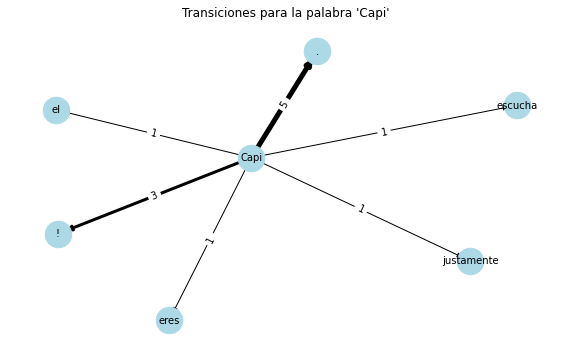

In [57]:
markov_predictor.visualize_transitions("Capi")